## Why Cross Validation?
- train_test_split split the data randomly
- Hence everytime we will build model with random data we may get different accuracies, so how you will conclude what is true accuracy of data.
- Hence you will build many models with different train_test_split, and will take average of all accuracies to conclude final accuracies.


## 1. Hold-out cross-validation
- Split data into train and test set
- Check accuracy on testing data
- Save Result on that data

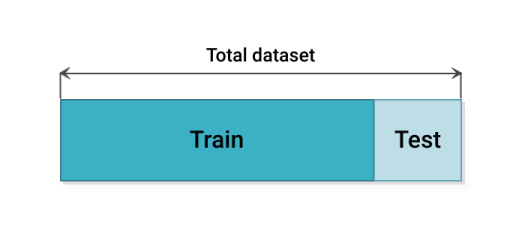

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4],[5,6]])
y = np.array([1, 2, 3])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
print("Training X = \n",X_train)
print()
print("Testing X = \n",X_test)

Training X = 
 [[3 4]
 [1 2]]

Testing X = 
 [[5 6]]


 
## 2. Leave One Out Cross Validation
- One data point for testing and rest for training. 
- The number of folds equals the number of instances in the data set

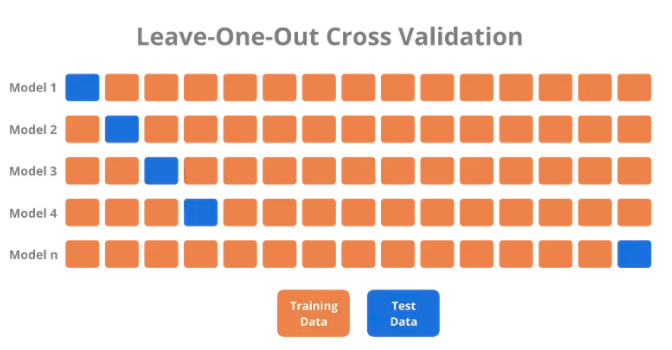

#### Disadvantage:
1. High number of iterations
2. Low Biased and low accuracy


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4],[5,6]])
y = np.array([1, 2, 3])
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [1 2] TEST: [0]
TRAIN: [0 2] TEST: [1]
TRAIN: [0 1] TEST: [2]


## 3. K-Fold Cross Validation
- Devide data into k equal folds
- Each time build model for k-1 fold and test it on remaining one fold
- Take Average Accuracy of all those model.
- Disadvantage is that it doesnt consider the imbalance classifications
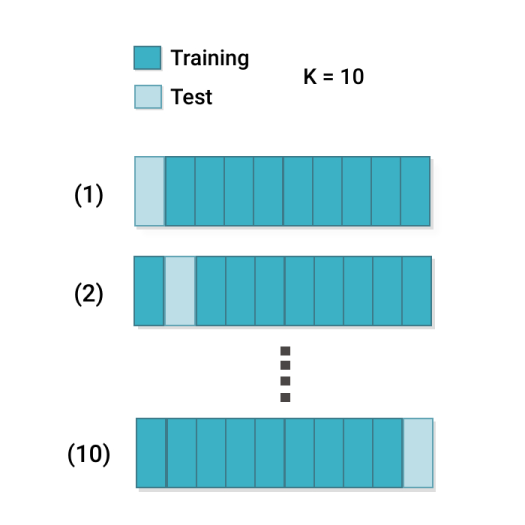

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## 4. Stratified k-fold Cross validartion
- It is just a modified version of k-fold cross validation.
- It overcomes disadvantage of k-fold cross validation and handles the imbalance data as well


In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1,2, 3, 1])
skf = KFold(n_splits=2)

RMSE_list=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model =LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error(y_test,y_pred)
    RMSE_list.append(RMSE)
np.mean(RMSE_list)

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


2.5

In [ ]:
RMSE_list

[2.4999999999999996, 2.5]

## 5. Cross_val_score

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X, y = datasets.load_diabetes(return_X_y=True)

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores)

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[-52.72497937 -55.03486476 -56.90068179 -54.85204179 -53.94638716]
Mean score of -54.69 with a standard deviation of 1.37
